/var/folders/9v/jcfdtcks4gqcxnckv1507c100000gn/T/ipykernel_4777/3996423563.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(list(tickers.values()), period='60d', interval='1d')['Close']
[*********************100%***********************]  10 of 10 completed


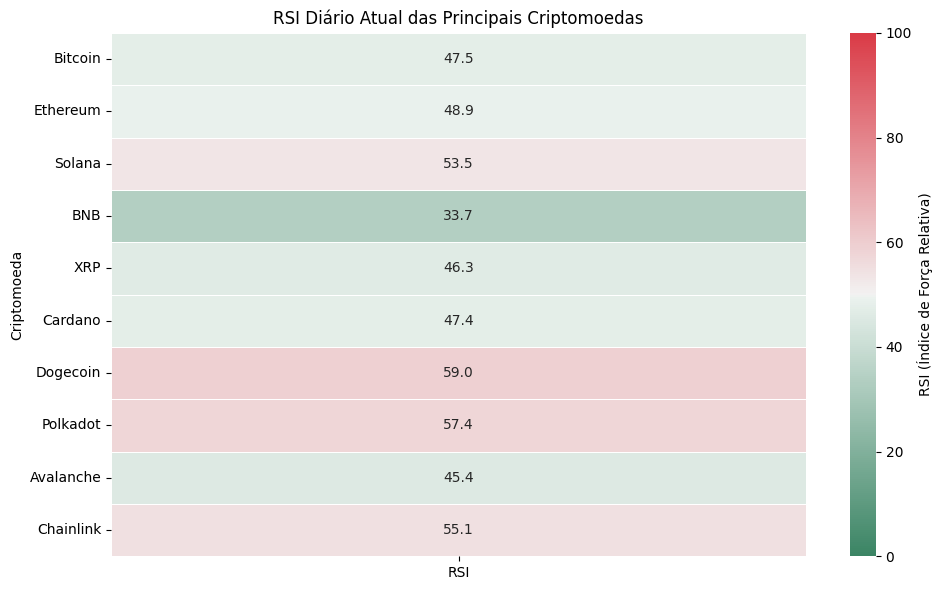

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calcular_rsi(close, period=14):
    delta = close.diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)

    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

tickers = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Solana': 'SOL-USD',
    'BNB': 'BNB-USD',
    'XRP': 'XRP-USD',
    'Cardano': 'ADA-USD',
    'Dogecoin': 'DOGE-USD',
    'Polkadot': 'DOT-USD',
    'Avalanche': 'AVAX-USD',
    'Chainlink': 'LINK-USD'
}

dados = yf.download(list(tickers.values()), period='60d', interval='1d')['Close']
dados.columns = tickers.keys()
dados.dropna(axis=1, how='all', inplace=True)

rsi_df = pd.DataFrame()

for cripto in dados.columns:
    rsi = calcular_rsi(dados[cripto])
    rsi_df[cripto] = rsi

rsi_mais_recente = rsi_df.tail(1).T
rsi_mais_recente.columns = ['RSI']

plt.figure(figsize=(10, 6))
sns.heatmap(rsi_mais_recente, annot=True, fmt=".1f", linewidths=0.5,
            cmap=sns.diverging_palette(150, 10, as_cmap=True),
            vmin=0, vmax=100, cbar_kws={'label': 'RSI (Índice de Força Relativa)'})

plt.title('RSI Diário Atual das Principais Criptomoedas')
plt.ylabel('Criptomoeda')
plt.xlabel('')
plt.tight_layout()
plt.show()
